<a href="https://colab.research.google.com/github/melodybucchino/spotify-oasis-analysis/blob/main/oasis_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()
!unzip spotify_charts.zip -d spotify_charts

Saving spotify_charts.zip to spotify_charts.zip
Archive:  spotify_charts.zip
  inflating: spotify_charts/regional-global-weekly-2025-09-25.csv  
  inflating: spotify_charts/__MACOSX/._regional-global-weekly-2025-09-25.csv  
  inflating: spotify_charts/regional-global-weekly-2025-06-19.csv  
  inflating: spotify_charts/__MACOSX/._regional-global-weekly-2025-06-19.csv  
  inflating: spotify_charts/regional-global-weekly-2025-06-26.csv  
  inflating: spotify_charts/__MACOSX/._regional-global-weekly-2025-06-26.csv  
  inflating: spotify_charts/regional-global-weekly-2025-07-03.csv  
  inflating: spotify_charts/__MACOSX/._regional-global-weekly-2025-07-03.csv  
  inflating: spotify_charts/regional-global-weekly-2025-07-10.csv  
  inflating: spotify_charts/__MACOSX/._regional-global-weekly-2025-07-10.csv  
  inflating: spotify_charts/regional-global-weekly-2025-07-17.csv  
  inflating: spotify_charts/__MACOSX/._regional-global-weekly-2025-07-17.csv  
  inflating: spotify_charts/regional-glob

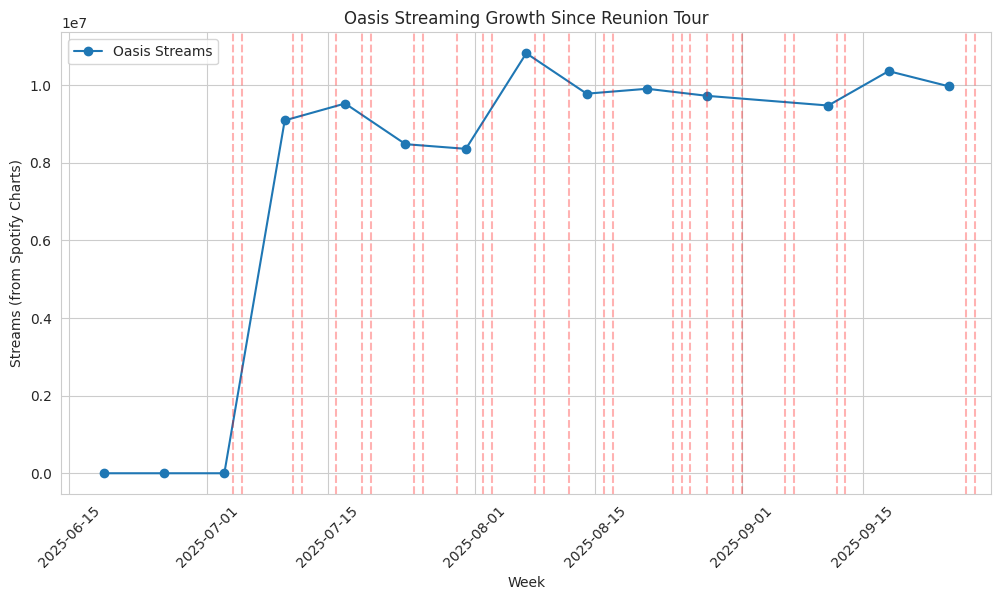

Oasis Streams Insights:
Streams first week: 9,094,578
Streams last week: 9,972,615
Total growth since tour start: 9.65%
Most streams in a week: 10,826,089 on Aug 07, 2025
Biggest growth since first week: 19.04%


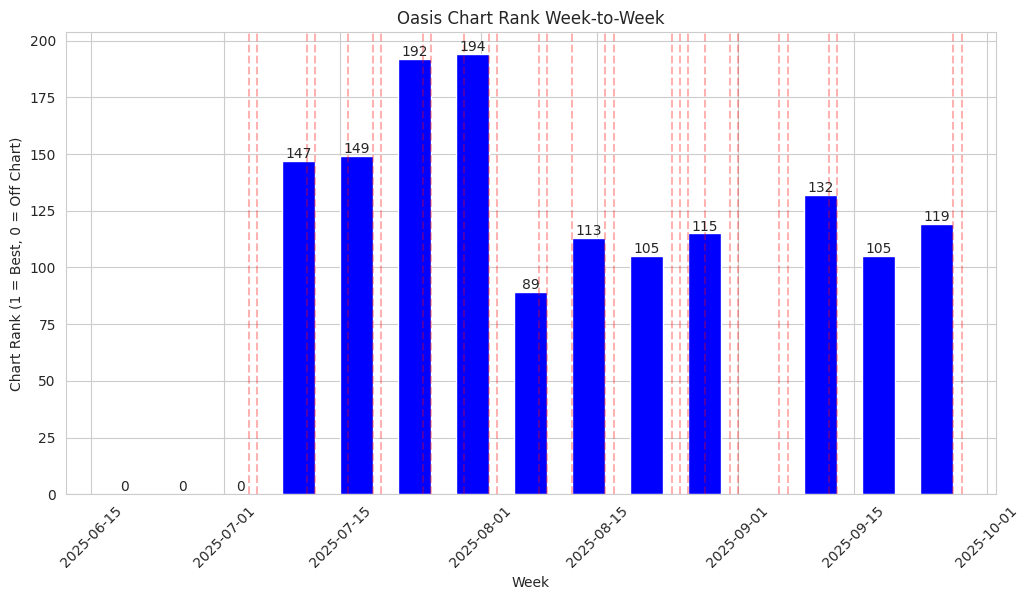

Oasis Chart Rank Insights:
Best chart rank: 89 on Aug 07, 2025


In [11]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Load all weekly CSVs
folder = 'spotify_charts/'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

dfs = []
for f in all_files:
    df = pd.read_csv(f)

    # Extract week date from filename
    date_parts = os.path.basename(f).split('-')[-3:]
    date_str = '-'.join(date_parts).replace('.csv', '')
    df['week'] = pd.to_datetime(date_str)

    dfs.append(df)

# Combine all weekly data
charts_df = pd.concat(dfs, ignore_index=True)

# Filter for Oasis
charts_df['artist_names'] = charts_df['artist_names'].str.lower()
oasis_df = charts_df[charts_df['artist_names'].str.contains('oasis')].copy()

# Aggregate weekly streams
all_weeks = pd.DataFrame({'week': sorted(charts_df['week'].unique())})

oasis_weekly = oasis_df.groupby('week')['streams'].sum().reset_index()
oasis_full = all_weeks.merge(oasis_weekly, on='week', how='left').fillna(0)

# Plot streaming growth
plt.figure(figsize=(12,6))
plt.plot(oasis_full['week'], oasis_full['streams'], marker='o', label='Oasis Streams')
plt.title("Oasis Streaming Growth Since Reunion Tour")
plt.xlabel("Week")
plt.ylabel("Streams (from Spotify Charts)")
plt.xticks(rotation=45)

# Tour dates example
tour_dates = pd.to_datetime([
    '2025-07-04','2025-07-05','2025-07-11','2025-07-12',
    '2025-07-16','2025-07-19','2025-07-20','2025-07-25',
    '2025-07-26','2025-07-30','2025-08-02','2025-08-03',
    '2025-08-08','2025-08-09','2025-08-12','2025-08-16',
    '2025-08-17','2025-08-24','2025-08-25','2025-08-26',
    '2025-08-28','2025-08-31','2025-09-01','2025-09-06',
    '2025-09-07','2025-09-12','2025-09-13','2025-09-27','2025-09-28'
])
for date in tour_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.3)

plt.legend()
plt.show()

# Growth calculations
first_week_streams = oasis_full['streams'].iloc[3]
last_week_streams = oasis_full['streams'].iloc[-1]
most_streams = oasis_full['streams'].max()
most_streams_date = oasis_full.loc[oasis_full['streams'] == most_streams, 'week'].iloc[0].strftime('%b %d, %Y')

print("Oasis Streams Insights:")
print(f"Streams first week: {int(first_week_streams):,}")
print(f"Streams last week: {int(last_week_streams):,}")
print(f"Total growth since tour start: {(last_week_streams-first_week_streams)/max(first_week_streams,1)*100:.2f}%")
print(f"Most streams in a week: {int(most_streams):,} on {most_streams_date}")
print(f"Biggest growth since first week: {(most_streams-first_week_streams)/max(first_week_streams,1)*100:.2f}%")

# Aggregate weekly rank
oasis_rank = oasis_df.groupby('week')['rank'].min().reset_index()
oasis_rank_full = all_weeks.merge(oasis_rank, on='week', how='left').fillna(0).sort_values('week')

# Plot chart rank
plt.figure(figsize=(12,6))
bars = plt.bar(oasis_rank_full['week'], oasis_rank_full['rank'], color='blue', width=4)
plt.title("Oasis Chart Rank Week-to-Week")
plt.xlabel("Week")
plt.ylabel("Chart Rank (1 = Best, 0 = Off Chart)")
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

for date in tour_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.3)

plt.show()

# Insights for chart rank
# Best rank and date
best_rank = oasis_rank_full[oasis_rank_full['rank'] > 0]['rank'].min()
best_rank_date = oasis_rank_full[oasis_rank_full['rank'] == best_rank]['week'].iloc[0].strftime('%b %d, %Y')


print("Oasis Chart Rank Insights:")
print(f"Best chart rank: {int(best_rank)} on {best_rank_date}")
